In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=6cd4ea89ef16355de67bd1ae0574cbbdf7f7f864c2922a904ecb7bcc90457e01
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

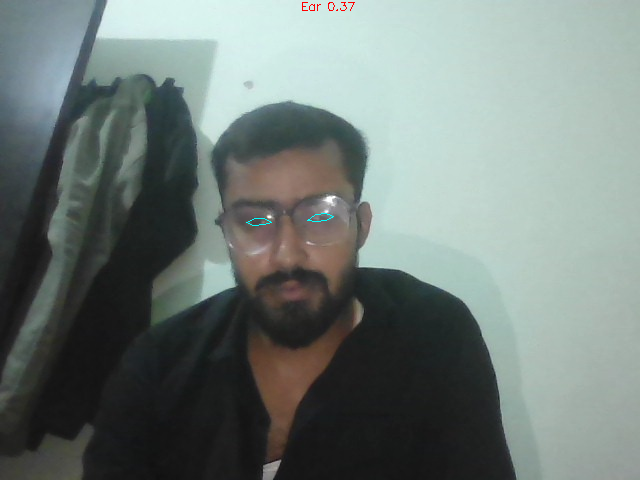

<IPython.core.display.Javascript object>

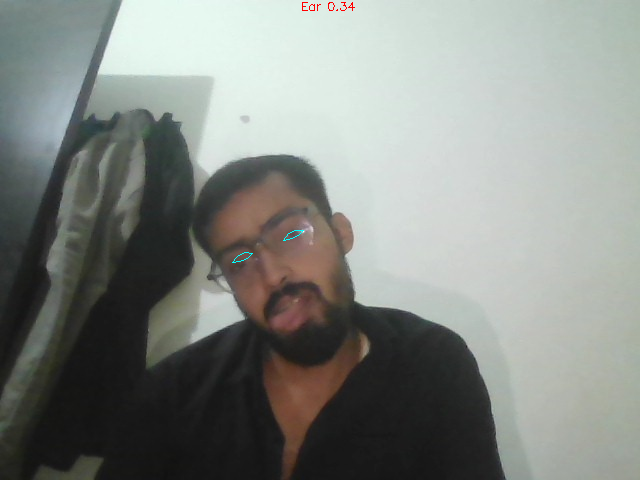

<IPython.core.display.Javascript object>

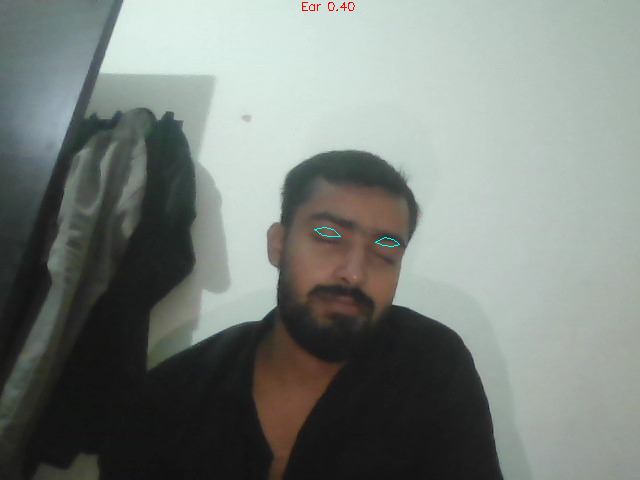

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np
from scipy.spatial import distance as dist
from google.colab.output import eval_js
from IPython.display import display, Javascript
from base64 import b64decode
import  face_recognition
from google.colab.patches import cv2_imshow

min_aer = 0.30
eye_ar_cosec_frames = 10

counter = 0
alarm_on = False


def eye_aspect_ratio(eye):
    a = dist.euclidean(eye[1], eye[5])
    b = dist.euclidean(eye[2], eye[5])
    c = dist.euclidean(eye[0], eye[3])
    ear = (a + b) / (2 * c)
    return ear


def capture_image():
    display(Javascript('''
        async function takePhoto(quality) {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = 'Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({ 'video': true });

          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          // Resize the output to fit the video element.
          google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

          // Wait for Capture to be clicked.
          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getVideoTracks()[0].stop();
          div.remove();
          return canvas.toDataURL('image/jpeg', quality);
        }
        '''))
    data = eval_js('takePhoto({})')
    binary = b64decode(data.split(',')[1])
    return cv2.imdecode(np.frombuffer(binary, np.uint8), -1)


def main():
    global counter, alarm_on
    while True:
        frame = capture_image()
        face_landmarks_list = face_recognition.face_landmarks(frame)
        for face_landmark in face_landmarks_list:
            leftEye = face_landmark['left_eye']
            righteye = face_landmark["right_eye"]

            leftear = eye_aspect_ratio(leftEye)
            rightear = eye_aspect_ratio(righteye)
            ear = (leftear + rightear) / 2

            lpts = np.array(leftEye)
            rpts = np.array(righteye)

            cv2.polylines(frame, [lpts], True, (255, 255, 0), 1)
            cv2.polylines(frame, [rpts], True, (255, 255, 0), 1)

            if ear < min_aer:
                counter += 1
                if counter >= eye_ar_cosec_frames:
                    if not alarm_on:
                        alarm_on = True
                        # Replace the winsound alert with an alternative method
                        print("Alert! Wake up! Danger!!!")

                cv2.putText(frame, "Alert! Wake up! Danger!!!", (5, 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)

            else:
                counter = 0
                alarm_on = False

            cv2.putText(frame, "Ear {:.2f}".format(ear), (300, 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)

            # Use cv2_imshow instead of cv2.imshow for displaying images in Colab
            cv2_imshow(frame)

        if cv2.waitKey(1) == ord('q'):
            break

    cv2.destroyAllWindows()


if __name__ == '__main__':
    main()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp audio.mp3 content/drive/audio.mp3

cp: cannot stat 'audio.mp3': No such file or directory
